# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
grocery = pd.read_csv("../data/Wholesale customers data.csv")

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
grocery.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# What does each column means?
'''
1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customer Channel - Horeca (Hotel/Restaurant/Cafè) or Retail channel (Nominal)
8) REGION: customer region - Lisbon, Oporto or Other (Nominal)
'''

'\n1) FRESH: annual spending (m.u.) on fresh products (Continuous);\n2) MILK: annual spending (m.u.) on milk products (Continuous);\n3) GROCERY: annual spending (m.u.)on grocery products (Continuous);\n4) FROZEN: annual spending (m.u.)on frozen products (Continuous)\n5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)\n6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);\n7) CHANNEL: customer Channel - Horeca (Hotel/Restaurant/Cafè) or Retail channel (Nominal)\n8) REGION: customer region - Lisbon, Oporto or Other (Nominal)\n'

In [5]:
# No categorical data to convert
grocery.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
# No missing data to remove
grocery.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

"I see high correlation between GROCERY and DETERGENTS_PAPER (0.92) but due to the nature of the data \nI won't remove it from the data set."

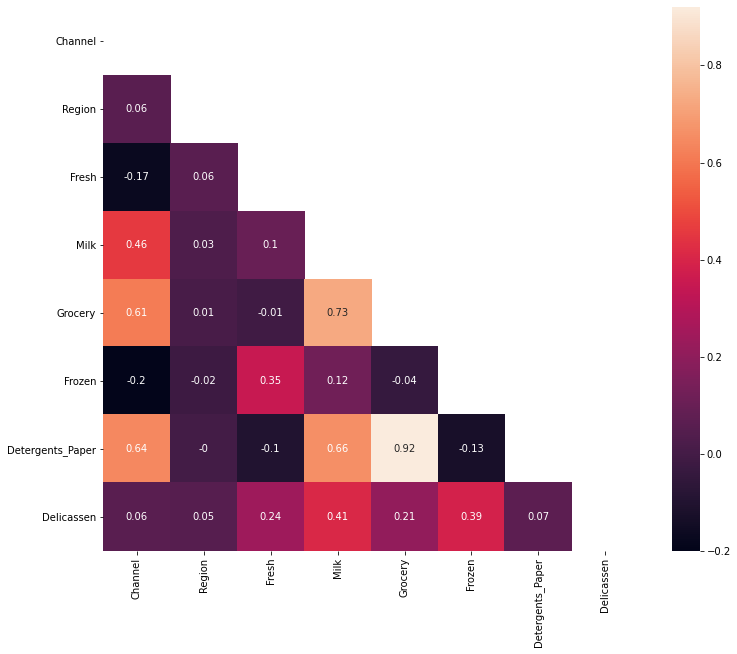

In [7]:
# Column colinearity

corr = round(grocery.corr(),2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True)

'''I see high correlation between GROCERY and DETERGENTS_PAPER (0.92) but due to the nature of the data 
I won't remove it from the data set.'''

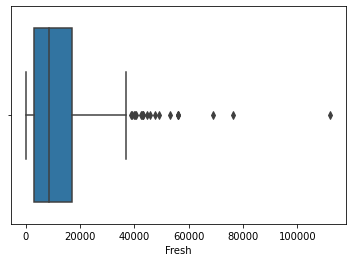

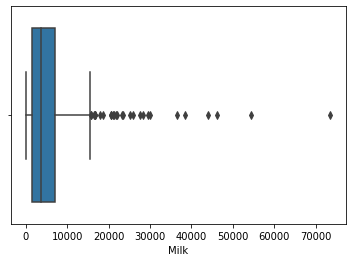

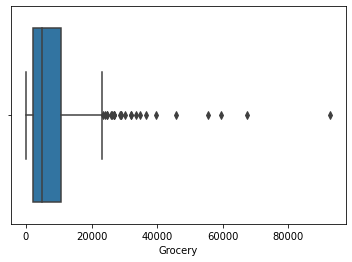

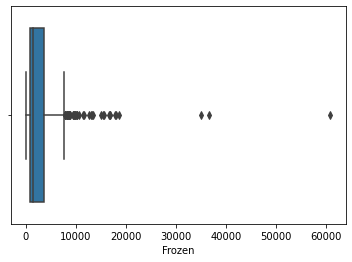

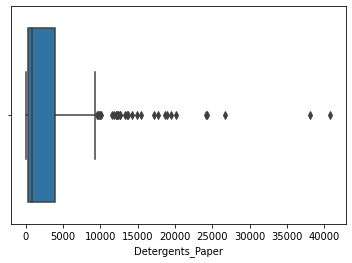

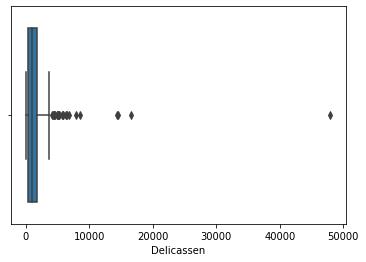

In [8]:
# Searching for outliers (boxplot method)
grocery1 = grocery.drop(["Channel", "Region"], axis=1).columns
for i in grocery1:
    plt.figure(i)
    sns.boxplot(x=grocery[i])


In [9]:
'''Yes there are outliers but they are probably explained by big buys made from the Horeca channel'''

'Yes there are outliers but they are probably explained by big buys made from the Horeca channel'

'Yes, the data is skewed to the right'

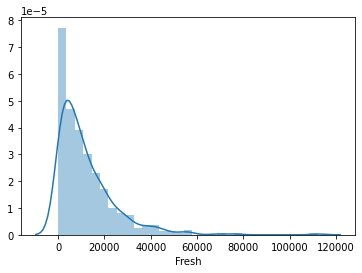

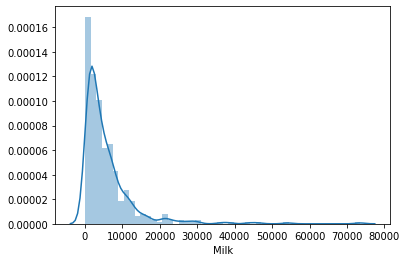

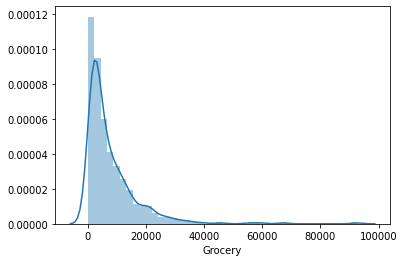

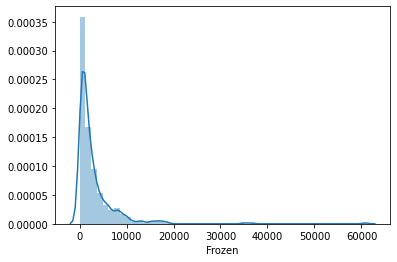

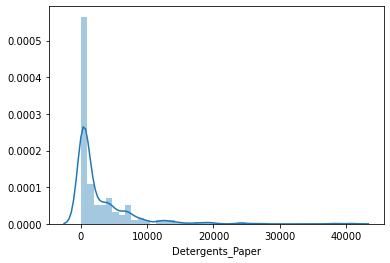

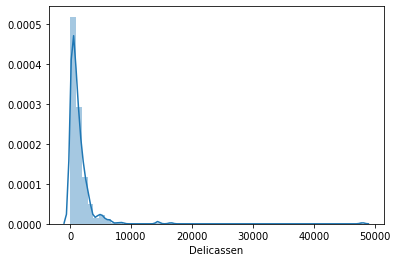

In [10]:
# Are the distributions skewed? 
for i in grocery1:
    plt.figure(i)
    sns.distplot(grocery[i])

'''Yes, the data is skewed to the right'''

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
# Your code here
grocery_clean = grocery.drop(grocery[grocery['Channel']==1].index)
grocery_clean

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
...,...,...,...,...,...,...,...,...
418,2,3,660,8494,18622,133,6740,776
421,2,3,17063,4847,9053,1031,3415,1784
423,2,3,17565,3686,4657,1059,1803,668
424,2,3,16980,2884,12232,874,3213,249


In [12]:
grocery_clean['Channel'].value_counts()

2    142
Name: Channel, dtype: int64

In [13]:
grocery_clean['Region'].value_counts()

3    105
2     19
1     18
Name: Region, dtype: int64

In [14]:
# Your comment here
'''
Even if there are outliers I won't remove them as sales are distributed by the Pareto rule. Those outliers may count
for 20% of the revenue.

As we want only the retail customers and not the Horeca channel, I'm dropping every value that is classified as a
Channel = 1
'''

"\nEven if there are outliers I won't remove them as sales are distributed by the Pareto rule. Those outliers may count\nfor 20% of the revenue.\n\nAs we want only the retail customers and not the Horeca channel, I'm dropping every value that is classified as a\nChannel = 1\n"

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [37]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
scaler.fit(grocery_clean.drop(["Channel", 'Region'], axis=1))
customers_scale = scaler.transform(grocery_clean.drop(["Channel", 'Region'], axis=1))
customers_scale = pd.DataFrame(customers_scale)
customers_scale.columns = ['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper','Delicassen']
customers_scale.head()

'''   
As I'm only evaluating the retail channel and not the Horeca I'm passing only the data and not the categorical for
Channel and Region
'''

"   \nAs I'm only evaluating the retail channel and not the Horeca I'm passing only the data and not the categorical for\nChannel and Region\n"

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [38]:
# Your code here:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(customers_scale)
customers_scale["Labels"] = model.labels_

customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,0.420352,-0.109948,-0.716772,-0.796394,-0.733064,-0.213383,0
1,-0.206266,-0.093982,-0.552587,0.060555,-0.634323,0.011589,0
2,-0.284873,-0.197865,-0.706710,0.416510,-0.598751,3.128331,2
3,1.530891,-0.550154,-0.746467,1.252422,-0.876152,1.762573,2
4,0.056797,-0.254782,-0.915969,-0.546173,-0.873280,-0.155342,0


Count the values in `labels`.

In [32]:
# Your code here:
customers_scale["Labels"].value_counts()

1    73
4    27
0    25
2    12
3     5
Name: Labels, dtype: int64

In [78]:
customers_scale.shape

(142, 8)

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [41]:
# Your code here
from sklearn.cluster import DBSCAN

model_2 = DBSCAN(eps=0.5)
model_2.fit(customers_scale.drop("Labels", axis=1))
customers_scale["labels_DBSCAN"] = model_2.labels_
customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels,labels_DBSCAN
0,0.420352,-0.109948,-0.716772,-0.796394,-0.733064,-0.213383,0,-1
1,-0.206266,-0.093982,-0.552587,0.060555,-0.634323,0.011589,0,-1
2,-0.284873,-0.197865,-0.706710,0.416510,-0.598751,3.128331,2,-1
3,1.530891,-0.550154,-0.746467,1.252422,-0.876152,1.762573,2,-1
4,0.056797,-0.254782,-0.915969,-0.546173,-0.873280,-0.155342,0,-1


Count the values in `labels_DBSCAN`.

In [42]:
# Your code here
customers_scale["labels_DBSCAN"].value_counts()

-1    137
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

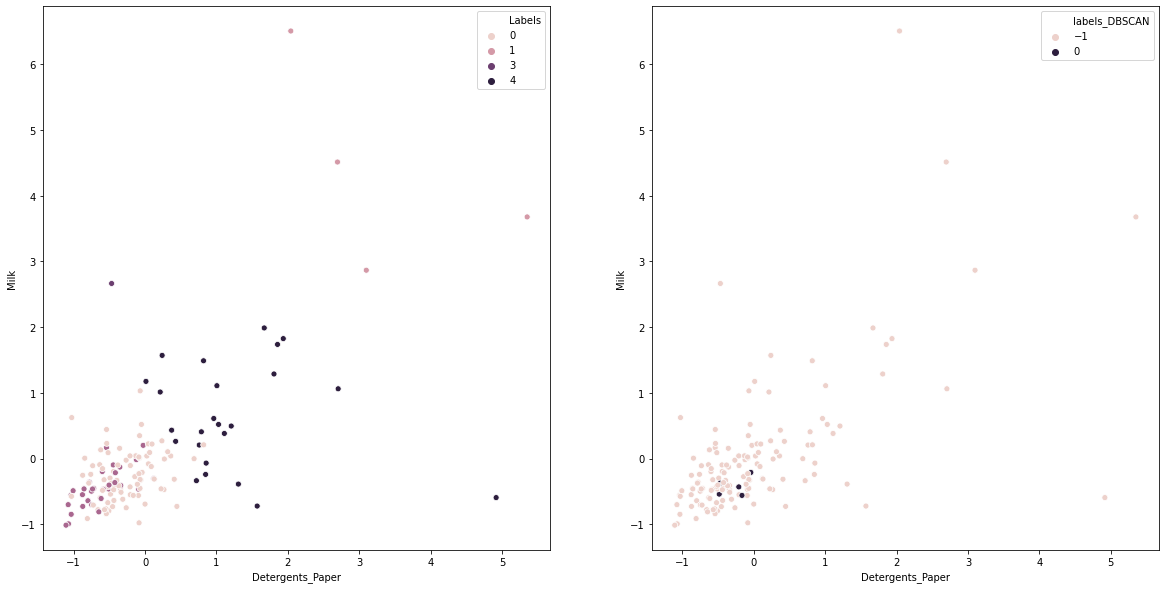

In [71]:
# Your code here:
cmap = sns.cubehelix_palette( as_cmap=True)
fig, ax = plt.subplots(1, 2, figsize = (20,10))
sns.scatterplot(customers_scale["Detergents_Paper"],
                customers_scale["Milk"], hue = customers_scale["Labels"],sizes=(1, 4), palette=cmap,ax = ax[0])
sns.scatterplot(customers_scale["Detergents_Paper"],
                customers_scale["Milk"], hue = customers_scale["labels_DBSCAN"],sizes=(1, 4), palette=cmap,ax = ax[1])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

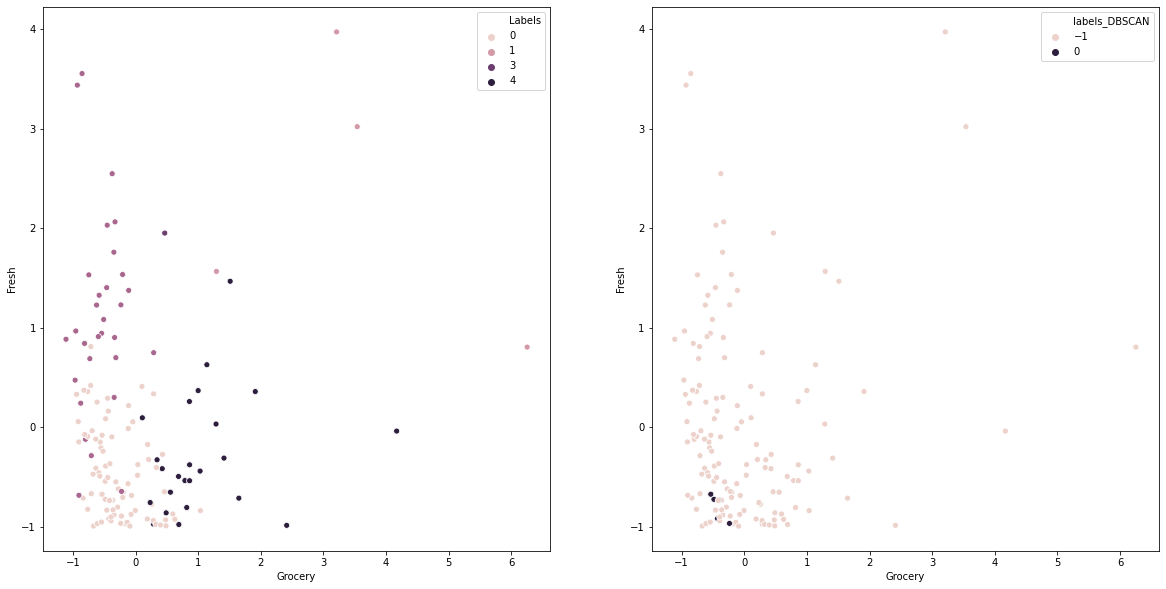

In [57]:
# Your code here:
fig, ax = plt.subplots(1, 2, figsize = (20,10))
sns.scatterplot(customers_scale["Grocery"], customers_scale["Fresh"], hue = customers_scale["Labels"], ax = ax[0])
sns.scatterplot(customers_scale["Grocery"], customers_scale["Fresh"], hue = customers_scale["labels_DBSCAN"], ax = ax[1])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

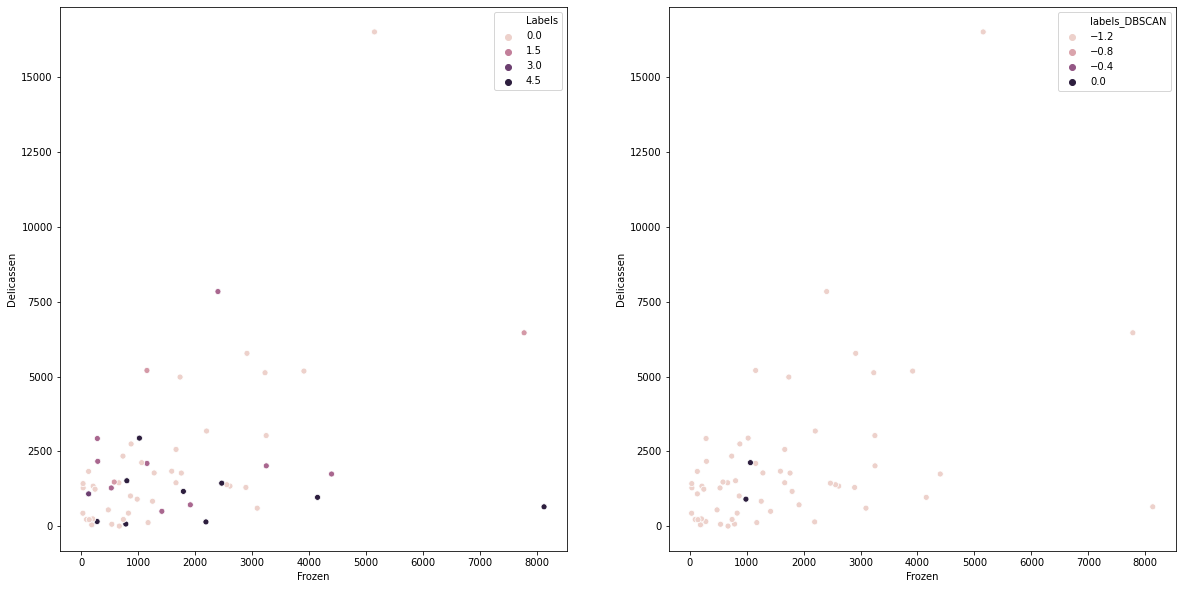

In [74]:
# Your code here:
fig, ax = plt.subplots(1, 2, figsize = (20,10))
sns.scatterplot(customers_final["Frozen"], customers_final["Delicassen"], hue = customers_final["Labels"], ax = ax[0])
sns.scatterplot(customers_final["Frozen"], customers_final["Delicassen"], hue = customers_final["labels_DBSCAN"], ax = ax[1])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [73]:
# Your code here:
customers_final.drop("labels_DBSCAN", axis=1).groupby("Labels").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,,,
0.0,2.0,3.0,9956.975000,12112.725000,14466.375000,1350.125000,6265.175000,1974.575000
1.0,2.0,3.0,20032.666667,26965.000000,30798.666667,3174.666667,12632.000000,4382.333333
2.0,2.0,3.0,19674.333333,11228.111111,16206.777778,1741.222222,6911.111111,2365.666667
3.0,2.0,3.0,1020.000000,8816.000000,12121.000000,134.000000,4508.000000,1080.000000
4.0,2.0,3.0,9133.444444,14705.555556,24069.777778,2405.555556,10444.111111,1005.222222


In [72]:
# Your observations here
customers_final.drop("Labels", axis=1).groupby("labels_DBSCAN").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,,,
-1.0,2.0,3.0,11303.266667,12160.1,16815.75,1648.85,7114.65,2008.683333
0.0,2.0,3.0,20235.500000,39008.5,18358.00,1026.50,11164.50,1513.500000


Which algorithm appears to perform better?

In [ ]:
# The K-means seems to perform better as we can identify different buying patterns

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [26]:
# Your code here

In [27]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [28]:
# Your code here

In [29]:
# Your comment here